---
output: html
author: GROUP 10
execute: 
    echo: true
    warning: false
    message: false
---

## **GROUP 10 - Asabere Asante, Jonathan Smith , Jimmy Stevens, Jack Jurkovich**

#     Group Project 1. CAPM and factor models

Import data from returns.xlsx

Variables:

Sector portfolio excess returns (return minus the risk free rate)

BMATRUSER Building materials

INDUSUSER Industrials

CNSMGUSER Consumer goods

FINANUSER Financials

TECNOUSER Technology

MktRF: Market return - risk free rate

SMB Fama-French Small minus Big

HML Fama- French High minus Low

RF risk free rate



Q1.  


a) (5 points) Estimate CAPM regressions for each of the 5 portfolios. 

b) (2 points) Which portfolio excess return exhibits the highest sensitivity to systematic risk and why?

c) (5 points) Which portfolios excess return is higher than that implied by the CAPM

d) (2 points) Is the CAPM rejected, and why?



In [5]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [6]:
data = pd.read_excel(r"C:\Users\KAsab\Desktop\Econometrics_Project\returns-1.xlsx")


a) (5 points) Estimate CAPM regressions for each of the 5 portfolios.

In [7]:
# List of portfolio returns
portfolios = ['BMATRUSER', 'INDUSUSER', 'CNSMGUSER', 'FINANUSER', 'TECNOUSER']

In [8]:
# Variables
MktRF = data['Mkt-RF']
RF = data['RF']
SMB = data['SMB']
HML = data['HML']

In [9]:
# CAPM Regression for each portfolio
capm_results = {}
for portfolio in portfolios:
    excess_return = data[portfolio] - RF
    X = sm.add_constant(MktRF)  # Add constant for α
    model = sm.OLS(excess_return, X).fit()
    capm_results[portfolio] = model

In [10]:
for portfolio, model in capm_results.items():
    print(f"Summary for {portfolio}:")
    print(model.summary())
    print("\n" + "="*80 + "\n")  # Separator for readability


Summary for BMATRUSER:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.914
Date:                Wed, 04 Dec 2024   Prob (F-statistic):              0.167
Time:                        21:30:02   Log-Likelihood:                -1728.5
No. Observations:                 532   AIC:                             3461.
Df Residuals:                     530   BIC:                             3470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3644      0.

Q1.  

 





b) (2 points) Which portfolio excess return exhibits the highest sensitivity to systematic risk and why?

The FINANUSER portfolio has the highest beta (Mkt-RF = 0.1501) among the portfolios. This indicates that its excess returns are most sensitive to systematic risk, as it has the strongest positive relationship with the market risk premium.

c) (5 points) Which portfolios excess return is higher than that implied by the CAPM

From the summaries, the intercept (const) for INDUSUSER (0.5432, p-value = 0.021) is significant. This indicates that the INDUSUSER portfolio has excess returns higher than those predicted by the CAPM.

d) (2 points) Is the CAPM rejected, and why?
The CAPM is rejected because it fails to fully explain the variation in excess returns for the portfolios, as evidenced by the very low R-squared values across all regressions, indicating poor explanatory power. Additionally, the significant intercept for the INDUSUSER portfolio (p-value = 0.021) suggests that its excess returns are higher than what the CAPM predicts.These factors collectively indicate that the CAPM does not adequately capture the risk-return relationship for the portfolios analyzed

Q2. (2 points) Do the residuals of the CAPM regression for INDUSUSER appear to be distributed normally, and why?


In [16]:
# Residual analysis for 'INDUSUSER'
indus_model = capm_results['INDUSUSER']
residuals = indus_model.resid

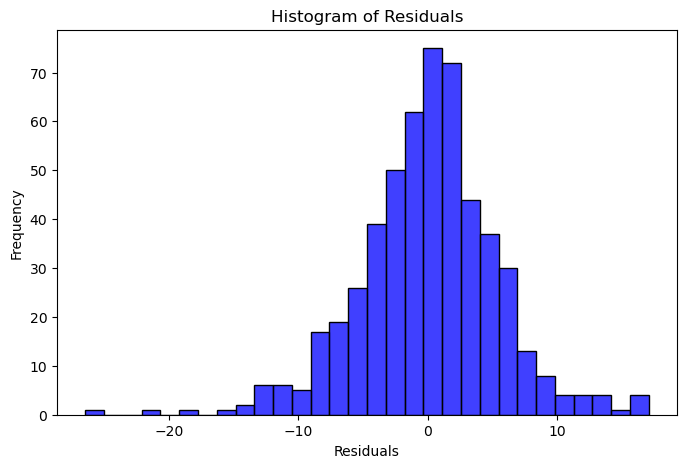

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

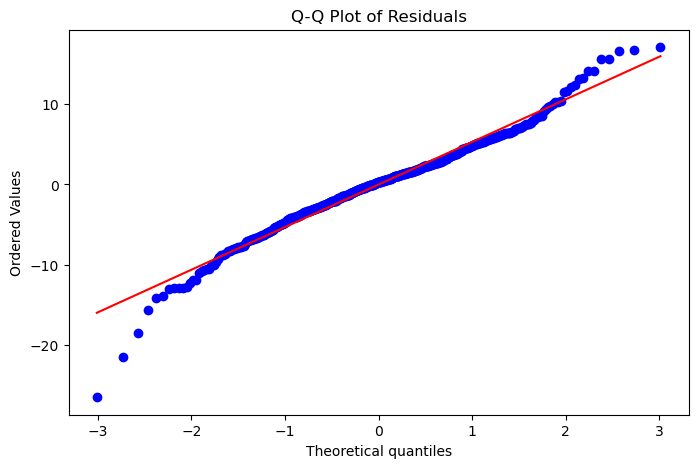

In [26]:
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

The residuals of the CAPM regression for INDUSUSER appear approximately normally distributed, as indicated by the bell-shaped histogram and the Q-Q plot, where most points align closely with the diagonal line. However, there are noticeable deviations in the tails of the Q-Q plot, suggesting potential non-normality at the extremes, possibly due to outliers or heavy tails

Q3. (2 points). Do the residuals of the CAPM regression for INDUSUSER appear to exhibit heteroskedasticity?


In [29]:
residuals = indus_model.resid
fitted_values = indus_model.fittedvalues

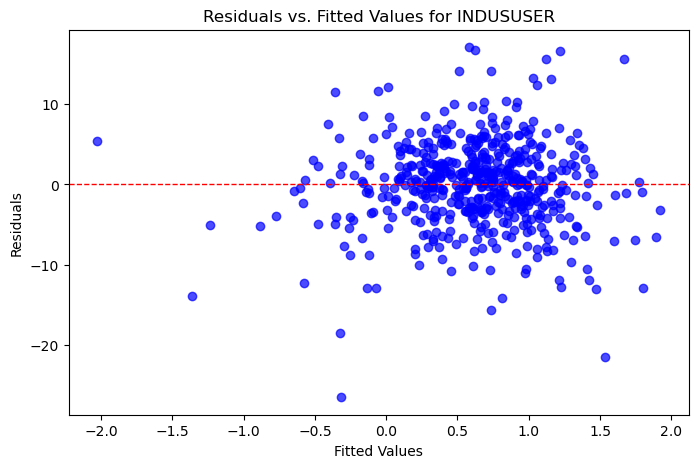

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.title('Residuals vs. Fitted Values for INDUSUSER')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The Residuals vs. Fitted Values plot for INDUSUSER shows residuals scattered around zero without a clear pattern, suggesting that the variance of residuals remains relatively constant across fitted values. There is no visible cone or systematic pattern indicating heteroskedasticity. However, some outliers are present, which may warrant further investigation. Based on the plot alone, there does not appear to be strong evidence of heteroskedasticity in the residuals.

Q4. (2 points) Do the residuals of of the CAPM regression for INDUSUSER exhibit autocorrelation?

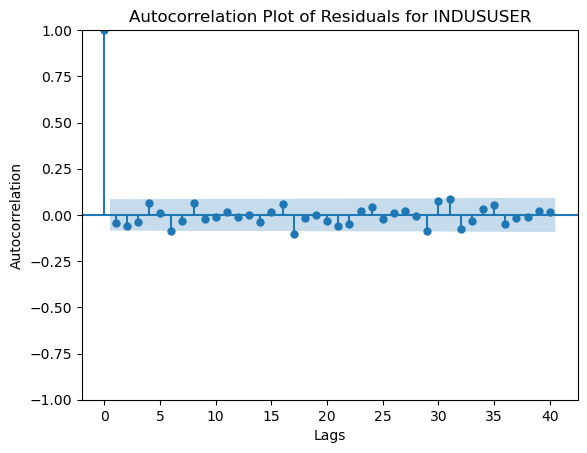

In [31]:
sm.graphics.tsa.plot_acf(indus_model.resid, lags=40, alpha=0.05)
plt.title('Autocorrelation Plot of Residuals for INDUSUSER')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

The autocorrelation plot (ACF) of residuals for `INDUSUSER` shows that the autocorrelation at lag 0 is, as expected, 1, but for all other lags, the autocorrelation values fall well within the confidence intervals. This suggests that the residuals do not exhibit significant autocorrelation. Consequently, the assumption of independence of residuals is satisfied, and there is no evidence of autocorrelation in the residuals of the CAPM regression for `INDUSUSER`.

Q5. 

a. (2 points) Compute the HAC (Newey-West) standard errors for the CAPM regressions of INDUSUSER and FINANUSER.

In [32]:
# Compute HAC standard errors for INDUSUSER
indus_hac_se = indus_model.get_robustcov_results(cov_type='HAC', maxlags=1)
print("HAC Standard Errors for INDUSUSER:")
print(indus_hac_se.summary())

HAC Standard Errors for INDUSUSER:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.085
Date:                Wed, 04 Dec 2024   Prob (F-statistic):             0.0796
Time:                        20:46:56   Log-Likelihood:                -1646.6
No. Observations:                 532   AIC:                             3297.
Df Residuals:                     530   BIC:                             3306.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

In [33]:
# Compute HAC standard errors for FINANUSER
finan_model = capm_results['FINANUSER']  # Access the FINANUSER model from the dictionary
finan_hac_se = finan_model.get_robustcov_results(cov_type='HAC', maxlags=1)
print("\nHAC Standard Errors for FINANUSER:")
print(finan_hac_se.summary())


HAC Standard Errors for FINANUSER:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.201
Date:                Wed, 04 Dec 2024   Prob (F-statistic):             0.0131
Time:                        20:47:20   Log-Likelihood:                -1673.0
No. Observations:                 532   AIC:                             3350.
Df Residuals:                     530   BIC:                             3358.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

b. (4 points) How the differences between the HAC standard errors and the OLS standard errors change the evaluation of significance at 5% level of the MktRF variable for each of the two portfolios?

The HAC (Newey-West) standard errors adjust for heteroscedasticity and autocorrelation, leading to changes in the significance of the `Mkt-RF` variable. For the `INDUSUSER` portfolio, the HAC adjustment increases the standard error from 0.053 to 0.063, resulting in a p-value increase from 0.037 to 0.080, making the `Mkt-RF` variable no longer significant at the 5% level. Conversely, for the `FINANUSER` portfolio, the standard error increases slightly from 0.056 to 0.060, with the p-value rising from 0.007 to 0.013, but the `Mkt-RF` variable remains significant at the 5% level. Thus, while HAC adjustments reduce the strength of evidence for significance, only the `INDUSUSER` portfolio loses statistical significance.

Q6. (2 points) Compute the correlation matrix of MktRF, SMB, and HML. Can the correlation of MktRF with SMB and HML be viewed as small?

In [35]:
# Compute the correlation matrix
variables = data[['Mkt-RF', 'SMB', 'HML']]  # Extract relevant variables
correlation_matrix = variables.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.240693 -0.256574
SMB     0.240693  1.000000 -0.221198
HML    -0.256574 -0.221198  1.000000


The correlation matrix indicates moderate relationships between `Mkt-RF` and the other two factors, with a correlation of 0.2407 with `SMB` and -0.2566 with `HML`. These values are not close to zero, meaning the correlations cannot be considered small. While they do not indicate strong dependencies, the moderate correlations suggest some interaction between `Mkt-RF` and the other factors, which may have implications for multicollinearity in regression models.

Q7. 

Estimate a multivariate regression adding SMB and HML to the CAPM regressions for each of
the 5 portfoliosa. (5 points) 


In [12]:
# Multivariate Regression (CAPM + SMB + HML)
multivariate_results = {}

for portfolio in portfolios:
    
    excess_return = data[portfolio] - RF
    X = data[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X) 
    model = sm.OLS(excess_return, X).fit()
    multivariate_results[portfolio] = model

In [14]:
for portfolio, model in multivariate_results.items():
    print(f"Summary for {portfolio}:")
    print(model.summary())
    print("\n" + "="*80 + "\n")  

Summary for BMATRUSER:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     6.752
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           0.000178
Time:                        21:31:55   Log-Likelihood:                -1719.5
No. Observations:                 532   AIC:                             3447.
Df Residuals:                     528   BIC:                             3464.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2379      0.

b. (2 points) For which portfolios the coefficients of SMB and HML are significantly different from zero?

The coefficients of `SMB` and `HML` are significantly different from zero for all five portfolios (`BMATRUSER`, `INDUSUSER`, `CNSMGUSER`, `FINANUSER`, and `TECNOUSER`). This is evidenced by p-values below 0.05 across all regressions, indicating that the `SMB` and `HML` factors have a statistically significant impact on the excess returns of these portfolios. These results suggest that both size (`SMB`) and value (`HML`) effects play a meaningful role in explaining the variation in returns for all the portfolios analyzed.

c. (3 points) Are there omitted variable biases in the original CAPM regressions for the 5 portfolios?

Yes, there are omitted variable biases in the original CAPM regressions for the five portfolios. Comparing the results of the original CAPM regressions (with only `Mkt-RF`) to the expanded three-factor model (with `Mkt-RF`, `SMB`, and `HML`), we observe significant changes in the coefficient estimates and their significance levels for `Mkt-RF`. For example, in the CAPM model, the `Mkt-RF` coefficient was significant for some portfolios, such as `INDUSUSER` and `FINANUSER`, but became less significant or insignificant in the three-factor model. Additionally, the inclusion of `SMB` and `HML` significantly improves the explanatory power of the model, as evidenced by higher R-squared values and significant coefficients for `SMB` and `HML` in all portfolios. These changes suggest that the exclusion of `SMB` and `HML` in the CAPM regressions biased the results, confirming omitted variable bias.